In [27]:
#Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Ler os 3 csv e concatenar em um único dataframe
df_horn = pd.read_csv('car_horn.csv')
df_engine = pd.read_csv('engine_idling.csv')
df_music= pd.read_csv('street_music.csv')

df_merged = pd.concat([df_horn, df_engine, df_music], ignore_index=True)

#Descrever dados statistícos do dataframe
df_merged.describe()

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio3,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,...,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,5.372727,-1.283013,0.886933,-0.265997,0.441550,-0.192490,0.221477,0.111411,0.063202,0.050821,...,1.156894,1.078334,0.945074,0.901583,0.805113,0.703390,0.705256,0.603340,0.589945,0.381094
std,2.608448,2.171417,1.473631,1.131559,0.946183,0.949428,0.802000,0.703441,0.605506,0.567942,...,0.607817,0.554776,0.538435,0.471941,0.389656,0.344689,0.361888,0.284494,0.266079,0.090830
min,-4.672307,-8.406664,-5.472591,-4.068377,-3.315314,-3.794095,-2.701501,-2.430486,-2.150302,-2.626062,...,0.302962,0.295266,0.265892,0.280354,0.286096,0.136682,0.260470,0.190234,0.176745,0.163466
25%,3.882166,-2.536702,0.280508,-0.988170,-0.089635,-0.770876,-0.272811,-0.343144,-0.291235,-0.287916,...,0.685229,0.647132,0.571238,0.544908,0.505296,0.459624,0.456447,0.415239,0.409923,0.318419
50%,5.724727,-1.160933,0.956669,-0.292444,0.530860,-0.215778,0.289716,0.100542,0.084602,0.119355,...,0.980905,0.932937,0.773802,0.756078,0.706635,0.596791,0.604289,0.519002,0.508758,0.369822
75%,7.015029,0.238964,1.782225,0.492412,1.115302,0.462624,0.801696,0.641847,0.469940,0.401115,...,1.508246,1.400415,1.166704,1.140669,1.016539,0.859426,0.840128,0.694756,0.685980,0.423254
max,12.646471,4.432885,5.345490,2.914812,3.105604,2.236298,2.341576,2.336785,2.274243,1.717718,...,4.357339,3.717567,4.920654,3.605649,3.156427,2.844720,2.905896,2.263505,2.240934,1.119046


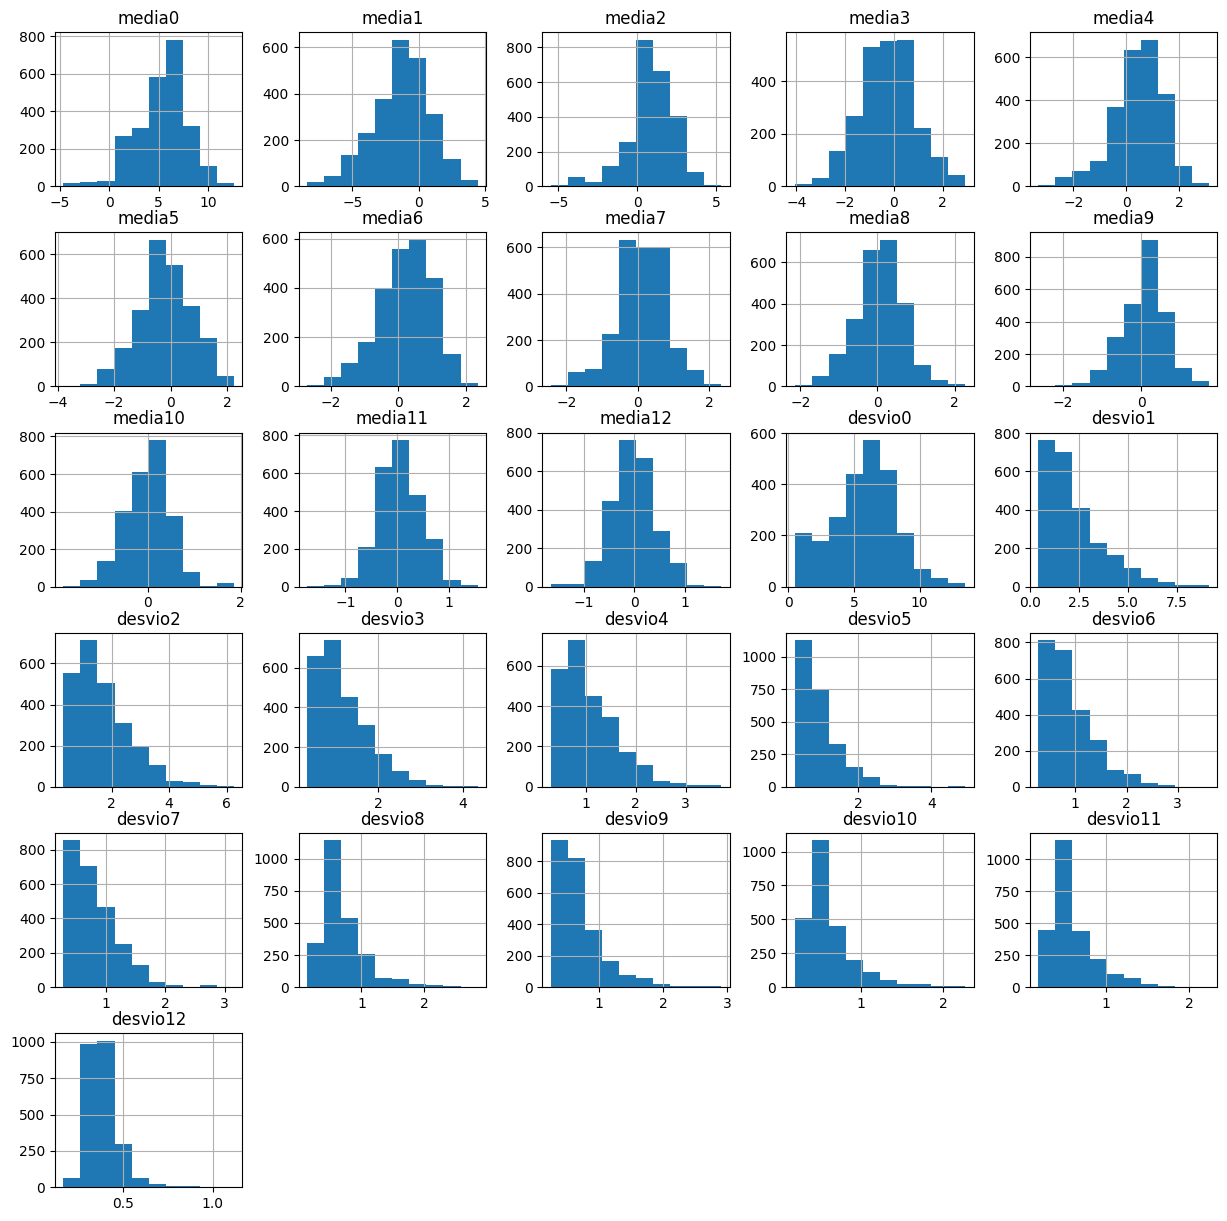

In [28]:
#Analise univariada
#Histograma
df_merged.hist(figsize=(15,15));

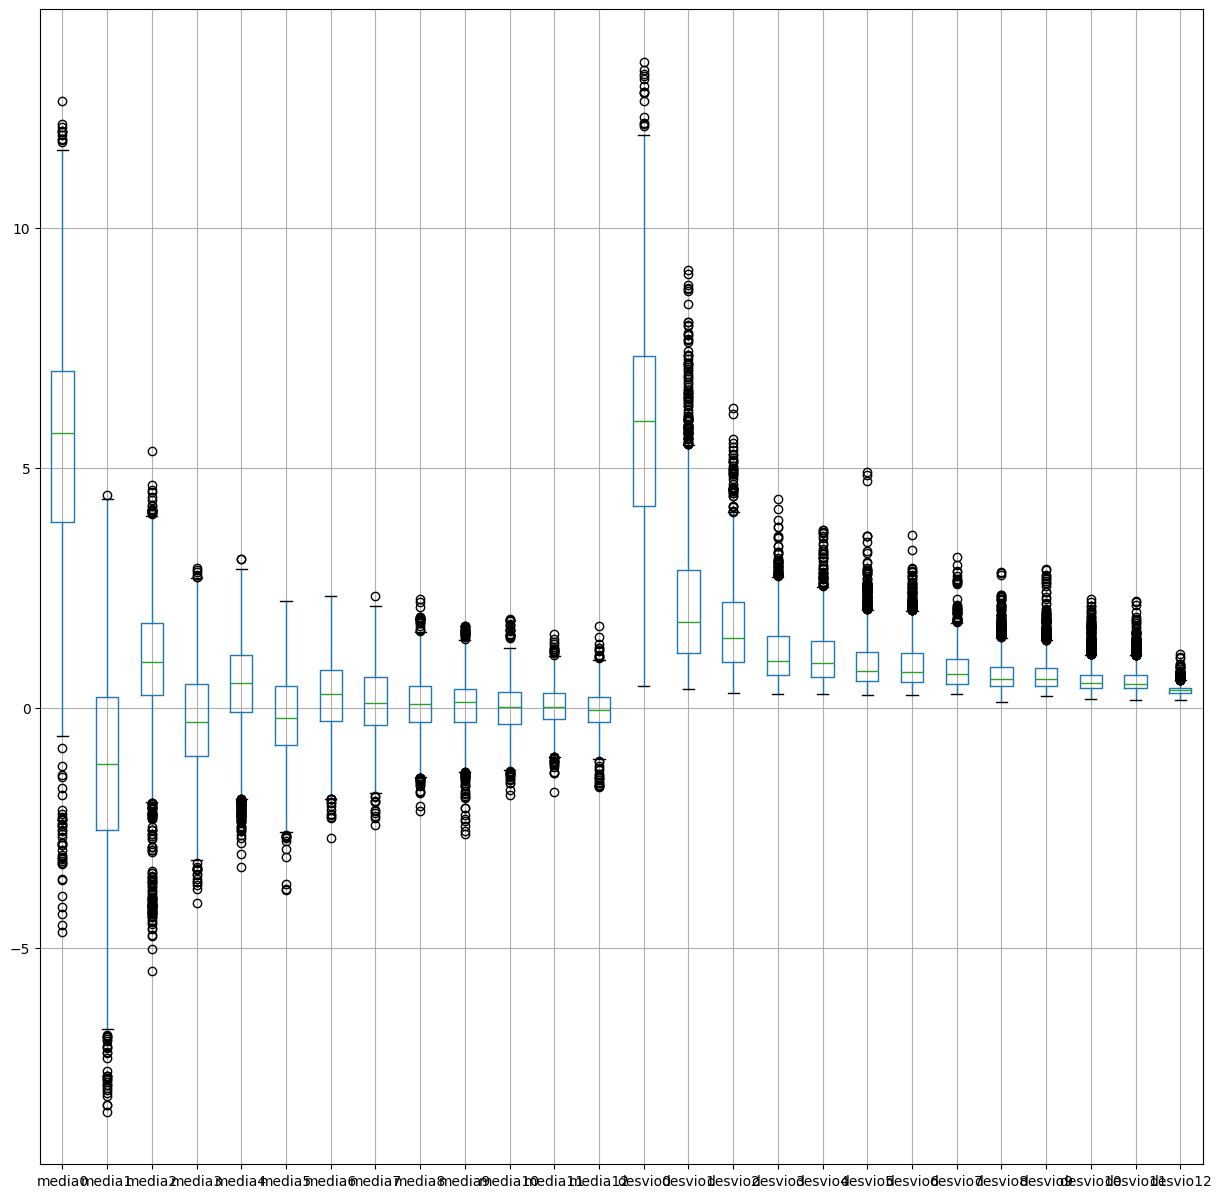

In [29]:
#Boxplot
df_merged.boxplot(figsize=(15,15));

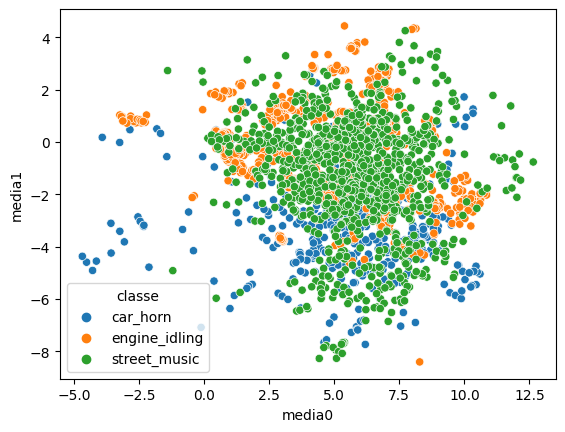

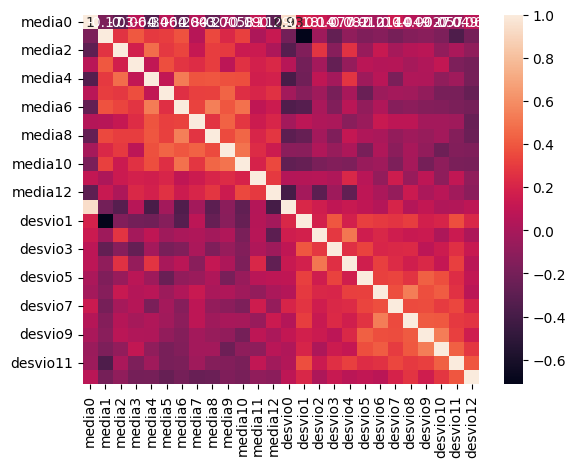

In [30]:
#Analise bivariada
#Scatterplot
sns.scatterplot(data=df_merged, x='media0', y='media1', hue='classe');
plt.show()

#Correlação
df_merged.corr(numeric_only=True);

#Heatmap
sns.heatmap(df_merged.corr(numeric_only=True), annot=True);

In [31]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Separar os dados em treino e teste
X = df_merged.drop('classe', axis=1)
y = df_merged['classe']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#Criar o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#Fazer as predições
y_pred = model.predict(X_test)

#Avaliar o modelo
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.8029315960912052
Confusion Matrix:
 [[ 85  19  17]
 [  1 207  34]
 [ 12  38 201]]
Classification Report:
                precision    recall  f1-score   support

     car_horn       0.87      0.70      0.78       121
engine_idling       0.78      0.86      0.82       242
 street_music       0.80      0.80      0.80       251

     accuracy                           0.80       614
    macro avg       0.82      0.79      0.80       614
 weighted avg       0.81      0.80      0.80       614

